# AOS_quickbackground

Pulling parts of `AOS_PS1_simulate`, to figure out how much background is added by quickbackground. 

First plot raw and postISR  `backgroundmode 0` , then for `quickbackground`, finally compare the two. 

Steps followed to simulate the images:

--> Copied locations of comcam arrows and removed all but first 11 stars:

       cp /project/scichris/aos/images/lsstCam/starExtra.inst  /project/scichris/aos/ps1_phosim/testBkgnd/
       
--> Run phosim without background for LsstCam R22 :

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/ps1_phosim/testBkgnd/starSingle.inst -i lsst -e 1 -c /project/scichris/aos/ps1_phosim/noBkgnd.cmd -p 25 -o /project/scichris/aos/ps1_phosim/testBkgnd/noBkgnd/ > starPhoSim.log 2>&1
    
--> Run phosim with quick background for LsstCam R22 :

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/ps1_phosim/testBkgnd/starSingle.inst -i lsst -e 1 -c /project/scichris/aos/ps1_phosim/qckBkgnd.cmd -p 25 -o /project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/ > starPhoSim.log 2>&1
    
--> Repackage

    phosim_repackager.py /project/scichris/aos/ps1_phosim/testBkgnd/noBkgnd/ --out_dir /project/scichris/aos/ps1_phosim/testBkgnd/noBkgnd/repackaged/ --inst lsst

    phosim_repackager.py /project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/ --out_dir /project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/repackaged/ --inst lsst



In [38]:
import os 
from lsst.daf import butler as dafButler
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from astropy.io import fits
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()

rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

## `backgroundmode 0` : 

Raw image:

960.0 1049.0


Text(0.5, 1.0, 'LsstCam, R22_S00 (ITL), \n backgroundmode 0')

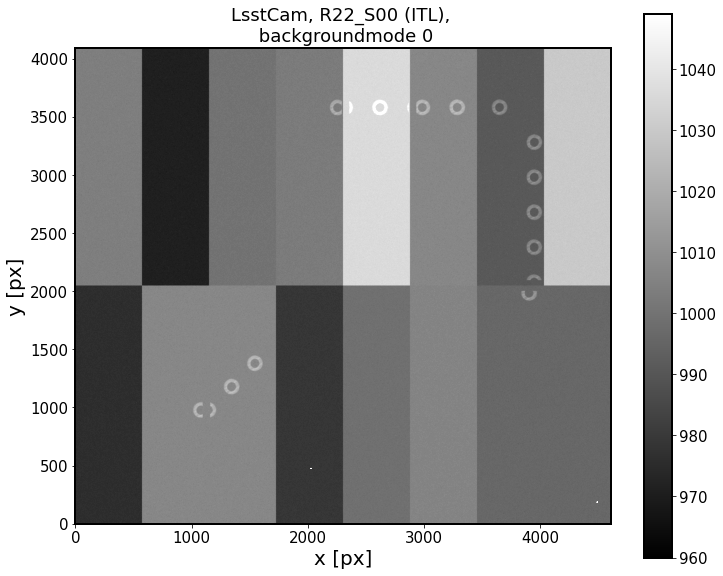

In [3]:
repo_name = 'DATA'
repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/noBkgnd/',repo_name)

butler = dafButler.Butler(repo_dir)

%matplotlib inline

exposure = butler.get('raw', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['LSSTCam/raw/all'])

data = exposure.image.array
vmin, vmax = zscale.get_limits(data)
print(vmin,vmax)

fig = plt.figure(figsize=(12, 10))
plt.imshow(data, origin='lower', vmin=vmin,vmax=vmax,cmap='gray')
plt.colorbar()
plt.xlabel('x [px]')
plt.ylabel('y [px]')
detector  = exposure.getDetector()
plt.title(f'LsstCam, {detector.getName()} (ITL), \n backgroundmode 0')


postISR image:

-17.874466 29.086128


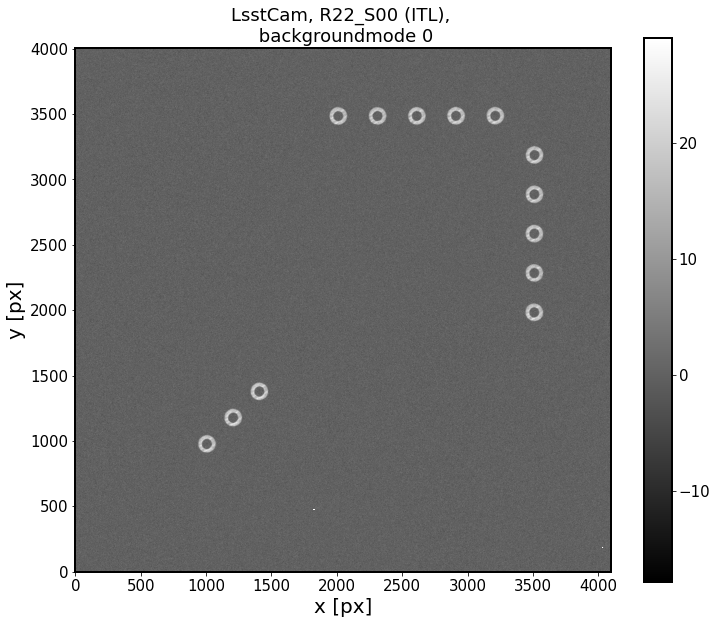

In [4]:
%matplotlib inline

exposure = butler.get('postISRCCD', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['run1'])
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)
print(vmin,vmax)

fig = plt.figure(figsize=(12, 10))
plt.imshow(data, origin='lower', vmin=vmin,vmax=vmax,cmap='gray')
plt.colorbar()
plt.xlabel('x [px]')
plt.ylabel('y [px]')
detector  = exposure.getDetector()
plt.title(f'LsstCam, {detector.getName()} (ITL), \n backgroundmode 0')


## quickbackground

raw image

959.0 1072.0


Text(0.5, 1.0, 'LsstCam, R22_S00 (ITL), \nquickbackground')

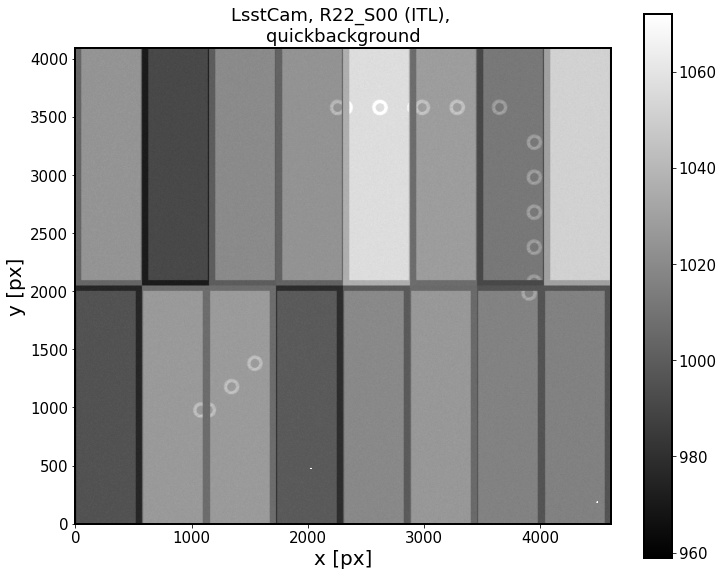

In [9]:
repo_name = 'DATA'
repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/',repo_name)
butler = dafButler.Butler(repo_dir)

%matplotlib inline

exposure = butler.get('raw', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['LSSTCam/raw/all'])

data = exposure.image.array
vmin, vmax = zscale.get_limits(data)
print(vmin,vmax)

fig = plt.figure(figsize=(12, 10))
plt.imshow(data, origin='lower', vmin=vmin,vmax=vmax,cmap='gray')
plt.colorbar()
plt.xlabel('x [px]')
plt.ylabel('y [px]')
detector  = exposure.getDetector()
plt.title(f'LsstCam, {detector.getName()} (ITL), \nquickbackground')


-7.9662666 60.39493


Text(0.5, 1.0, 'LsstCam, R22_S00 (ITL), \n quick background')

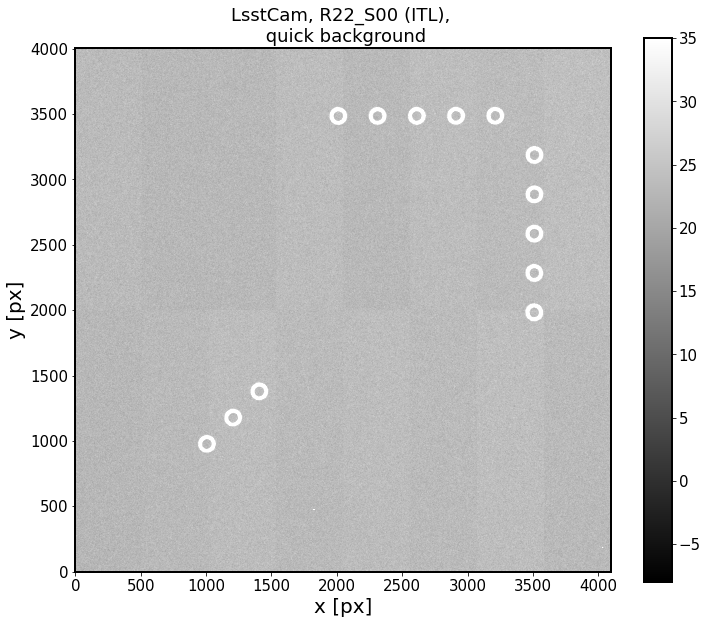

In [5]:
%matplotlib inline
repo_name = 'DATA'
repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/',repo_name)

butler = dafButler.Butler(repo_dir)
exposure = butler.get('postISRCCD', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['run3'])
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)
print(vmin,vmax)
fig = plt.figure(figsize=(12, 10))
plt.imshow(data, origin='lower', cmap='gray', vmin=vmin,vmax=35,)
plt.colorbar()
plt.xlabel('x [px]')
plt.ylabel('y [px]')
detector  = exposure.getDetector()
plt.title(f'LsstCam, {detector.getName()} (ITL), \n quick background')


## Compare background level in raw images

In [14]:
repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/noBkgnd/',repo_name)
butler = dafButler.Butler(repo_dir)
exposure = butler.get('raw', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['LSSTCam/raw/all'])

data = exposure.image.array


repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/',repo_name)
butler = dafButler.Butler(repo_dir)

%matplotlib inline

exposure = butler.get('raw', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['LSSTCam/raw/all'])

data1 = exposure.image.array

Compare the trace across multiple amps for `backgroundmode 0` vs `quickbackground` . The offset would correspond to the simulated background: 

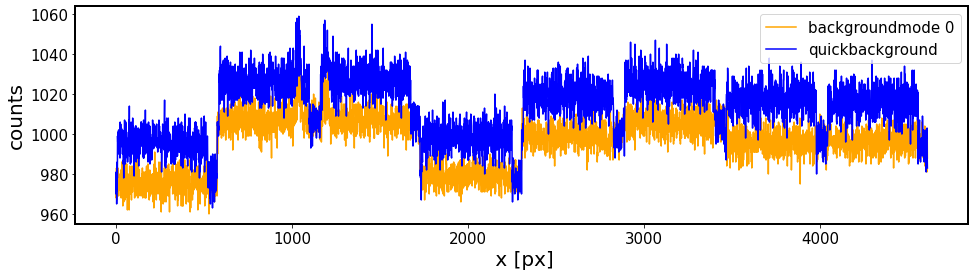

In [35]:
fig,ax = plt.subplots(1,1,figsize=(16,4))
ax.plot(data[1000,:], c='orange', label='backgroundmode 0')
ax.plot(data1[1000,:], c='blue', label='quickbackground')
ax.set_xlabel(' x [px]')
ax.set_ylabel('counts')
ax.legend(fontsize=15)

Text(0.5, 1.0, '(quickbackground) - (backgroundmode 0), y=1000')

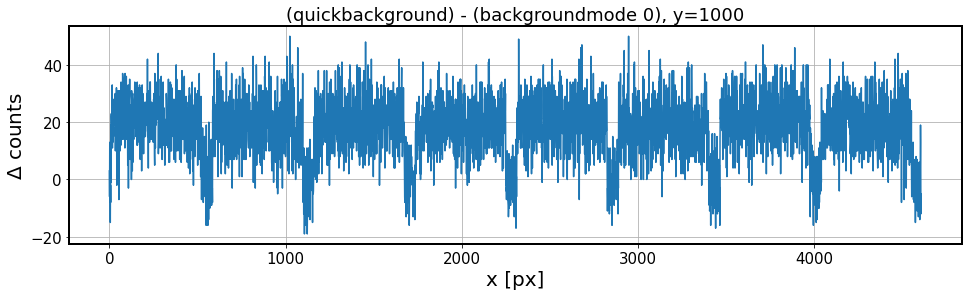

In [36]:
fig,ax = plt.subplots(1,1,figsize=(16,4))
ax.plot(data1[1000,:]-data[1000,:])
ax.grid()
ax.set_xlabel('x [px]')
ax.set_ylabel(r'$\Delta$ counts')
ax.set_title('(quickbackground) - (backgroundmode 0), y=1000')

So the added background corresponds to ~20 counts. In-between amps the level goes down to bias, which is the same (that's why it goes to 0).

In [39]:
repo_name = 'DATA'
repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/',repo_name)

butler = dafButler.Butler(repo_dir)

exposure = butler.get('postISRCCD', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['run3'])
data = exposure.image.array

In [67]:
4096/8

512.0

0 4096 512


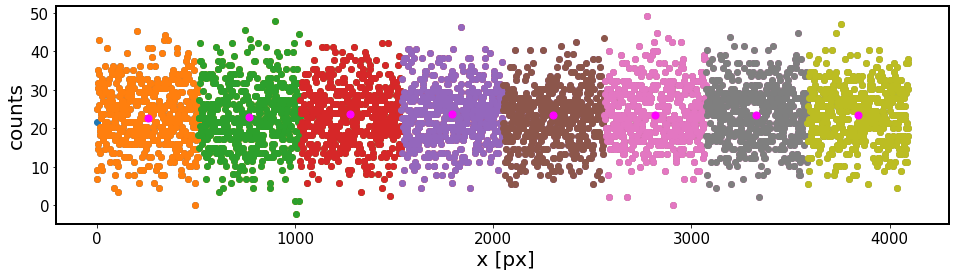

In [105]:

fig,ax = plt.subplots(1,1,figsize=(16,4))
y = data[2500,:]
x = np.arange(len(y))
#ax.scatter(x,y, c='orange', label='postISR qckBkgnd')
#ax.plot(data1[1000,:], c='blue', label='quickbackground')
ax.set_xlabel(' x [px]')
ax.set_ylabel('counts')



xlim = ax.get_xlim()
min_x, max_x , step_size = 0,4096, 512
print(min_x,max_x,step_size)
mean_x = np.arange(min_x, max_x+step_size , step_size)
dx =  step_size 
median_y = np.zeros(len(mean_x))

for j in range(len(median_y)):
    # take points that are within desired x_data limits for each bin
    # i.e. marginalize along y ( stack vertically)
    mask =  ((mean_x[j] - dx) < x)*(x<  (mean_x[j] + dx))
    median_y[j] = np.median(y[mask])
    #print(x[mask])
    ax.scatter(x[mask], y[mask])

ax.scatter(mean_x[:-1]+dx/2, median_y[1:], c = 'magenta', s=50)



In [109]:
np.std(median_y)

0.3849571918684761

Just a waste of time! Fix the segmentation.txt for comCam... But for lsstCam the variation was 0, and still there is a difference (???)

In [63]:
# plot the median across each amplifier (w/o donuts) 
median, bin_edges, binnumber = binned_statistic(np.arange(len(x)), values=x,
                                                statistic='median', bins=np.arange(0,len(x), len(x)/8))

In [65]:
x = np.log10(rho_in)
y = np.log10(rho_out)
fig,ax = plt.subplots()
ax.scatter(x,y)
xlim = ax.get_xlim()

min_x, max_x , step_size = xlim[0],xlim[1], 0.2
mean_x = np.arange(min_x, max_x+step_size , step_size)
dx = 0.5 * step_size 
median_y = np.zeros(len(mean_x))

for j in range(len(median_y)):
    # take points that are within desired x_data limits for each bin
    # i.e. marginalize along y ( stack vertically)
    mask =  ((mean_x[j] - dx) < x)*(x<  (mean_x[j] + dx))
    median_y[j] = np.median(y[mask])
    ax.scatter(x[mask], y[mask])
    
ax.scatter(mean_x[1:], median_y[1:], c = 'magenta', s=50)

NameError: name 'rho_in' is not defined

In [13]:
# show if butler worked 

import os
import numpy as np 
from lsst.daf import butler as dafButler
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import pandas as pd
import lsst.geom
from lsst.obs.base import (bboxFromIraf, MakeRawVisitInfoViaObsInfo, 
createInitialSkyWcs, createInitialSkyWcsFromBoresight)
from astropy.visualization import ZScaleInterval
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18


# read the butler repo 
root_dir = '/project/scichris/aos/ps1_phosim/comCam/high/focal/'
repo_name = 'DATA'
repo_dir = os.path.join(root_dir,repo_name)

print(f'Using {repo_dir}')
butler = dafButler.Butler(repo_dir)

exposure = butler.get('postISRCCD', detector='R22_S11', instrument="LSSTComCam",
          exposure=4021123106002,collections=['run1'])



Using /project/scichris/aos/ps1_phosim/comCam/high/focal/DATA


Text(0, 0.5, 'y [px]')

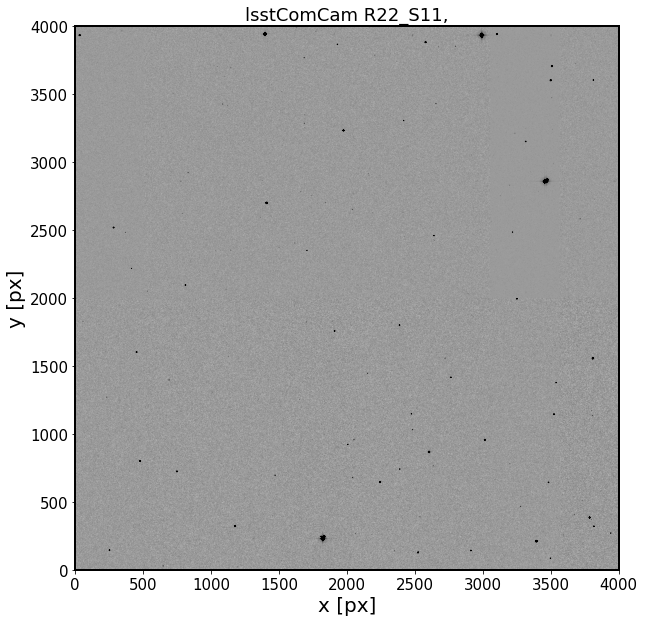

In [14]:
zscale = ZScaleInterval()
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(exposure.image.array, vmin=vmin,vmax=vmax,cmap='Greys')
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title(f"lsstComCam {exposure.getDetector().getName()},")
plt.xlabel('x [px]')
plt.ylabel('y [px]')

In [16]:
os.listdir(os.path.join(root_dir, 'repackaged'))

['CC_H_20211231_006002_R22_S21.fits',
 'CC_H_20211231_006002_R22_S20.fits',
 'CC_H_20211231_006002_R22_S00.fits',
 'CC_H_20211231_006002_R22_S01.fits',
 'CC_H_20211231_006002_R22_S02.fits',
 'CC_H_20211231_006002_R22_S22.fits',
 'CC_H_20211231_006002_R22_S10.fits',
 'CC_H_20211231_006002_R22_S12.fits',
 'CC_H_20211231_006002_R22_S11.fits']

In [4]:
# in the header - shows what phosim had used : 
from astropy.io import fits
import os 
root_dir = '/project/scichris/aos/ps1_phosim/comCam/high/focal/'
hdul = fits.open(os.path.join(root_dir,'repackaged', 'CC_H_20211231_006002_R22_S21.fits'))

for i in range(1,len(hdul)):
    a = [f'{key}: {hdul[i].header[key]}' for key in  ['AMPID','GAIN','BIAS']]
    print(a)

['AMPID: C10', 'GAIN: 1.31175', 'BIAS: 981.28']
['AMPID: C11', 'GAIN: 1.2476', 'BIAS: 1014.18']
['AMPID: C12', 'GAIN: 1.24468', 'BIAS: 963.585']
['AMPID: C13', 'GAIN: 1.29206', 'BIAS: 987.82']
['AMPID: C14', 'GAIN: 1.31307', 'BIAS: 994.621']
['AMPID: C15', 'GAIN: 1.34433', 'BIAS: 1027.52']
['AMPID: C16', 'GAIN: 1.3312', 'BIAS: 978.604']
['AMPID: C17', 'GAIN: 1.27525', 'BIAS: 993.499']
['AMPID: C07', 'GAIN: 1.17277', 'BIAS: 999.697']
['AMPID: C06', 'GAIN: 1.4078', 'BIAS: 1022.19']
['AMPID: C05', 'GAIN: 1.38711', 'BIAS: 1009.64']
['AMPID: C04', 'GAIN: 1.45445', 'BIAS: 983.055']
['AMPID: C03', 'GAIN: 1.39723', 'BIAS: 976.249']
['AMPID: C02', 'GAIN: 1.35632', 'BIAS: 980.802']
['AMPID: C01', 'GAIN: 1.37303', 'BIAS: 1011.29']
['AMPID: C00', 'GAIN: 1.34674', 'BIAS: 986.319']


In [ ]:
where on earth did I get these values from??? This is not the same as Craig;s update....

Look into that ASAP!  

In [23]:
# in obs_lsst   lsstCam mapper from where calibs were made : 
from lsst.obs.lsst import LsstComCam, LsstCam
camera = LsstComCam().getCamera()
detector = camera['R22_S21']
amp = detector['C10']
print(amp.getGain())


1.3104


??? were the values for `lsstComCam` changed recently (????)



## Simulate arrows on all sensors for lsstComCam   , no background
-- Run phosim quickly to see if I get the same values again:

I use the star catalog with an arrow on each comcam sensor ... 

(0.15, 0.35)

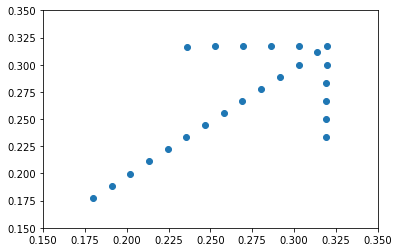

In [20]:

# show that catalog 
import numpy as np 
import pandas as pd

test_cat = np.genfromtxt('/project/scichris/aos/ps1_phosim/testBkgnd/starExtra.inst',
                        skip_header=16)
test_cat_df = pd.DataFrame(test_cat[:, 1:5], 
                           columns=['id', 'ra', 'dec', 'g'])
import matplotlib.pyplot as plt 
plt.scatter(test_cat_df['ra'],test_cat_df['dec'])
plt.xlim(0.15,0.35)
plt.ylim(0.15,0.35)

In [24]:
phosim_path = "/project/scichris/aos/phosim_syseng4/phosim.py"
root_dir = "/project/scichris/aos/ps1_phosim/testBkgnd/"
inst_file = os.path.join(root_dir, 'starExtra.inst')
instr = 'comcam'
cmd_file = '/project/scichris/aos/ps1_phosim/noBkgnd.cmd'
out_dir = os.path.join(root_dir, 'arrowsComCam','raw')
log_file = os.path.join(out_dir, 'starPhosim.log')

command = f"python {phosim_path} {inst_file} -i {instr} -e 1 \
-c {cmd_file} -p 25 -o {out_dir} > {log_file} 2>&1"
print(command)

python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/ps1_phosim/testBkgnd/starExtra.inst -i comcam -e 1 -c /project/scichris/aos/ps1_phosim/noBkgnd.cmd -p 25 -o /project/scichris/aos/ps1_phosim/testBkgnd/arrows/raw > /project/scichris/aos/ps1_phosim/testBkgnd/arrows/raw/starPhosim.log 2>&1


In [26]:
# repackage:
work_dir = out_dir
repackaged_dir = os.path.join(root_dir,"arrowsComCam", "repackaged")
command = f"phosim_repackager.py {out_dir} --out_dir {repackaged_dir} --inst {instr}"
print(command)

phosim_repackager.py /project/scichris/aos/ps1_phosim/testBkgnd/arrows/raw --out_dir /project/scichris/aos/ps1_phosim/testBkgnd/arrows/repackaged --inst comcam


In [27]:
# show the content of repackaged header :
root_dir = '/project/scichris/aos/ps1_phosim/testBkgnd/arrowsComCam/'
hdul = fits.open(os.path.join(root_dir,'repackaged', 'CC_H_20000217_006001_R22_S21.fits'))

for i in range(1,len(hdul)):
    a = [f'{key}: {hdul[i].header[key]}' for key in  ['AMPID','GAIN','BIAS']]
    print(a)

['AMPID: C10', 'GAIN: 1.31175', 'BIAS: 981.28']
['AMPID: C11', 'GAIN: 1.2476', 'BIAS: 1014.18']
['AMPID: C12', 'GAIN: 1.24468', 'BIAS: 963.585']
['AMPID: C13', 'GAIN: 1.29206', 'BIAS: 987.82']
['AMPID: C14', 'GAIN: 1.31307', 'BIAS: 994.621']
['AMPID: C15', 'GAIN: 1.34433', 'BIAS: 1027.52']
['AMPID: C16', 'GAIN: 1.3312', 'BIAS: 978.604']
['AMPID: C17', 'GAIN: 1.27525', 'BIAS: 993.499']
['AMPID: C07', 'GAIN: 1.17277', 'BIAS: 999.697']
['AMPID: C06', 'GAIN: 1.4078', 'BIAS: 1022.19']
['AMPID: C05', 'GAIN: 1.38711', 'BIAS: 1009.64']
['AMPID: C04', 'GAIN: 1.45445', 'BIAS: 983.055']
['AMPID: C03', 'GAIN: 1.39723', 'BIAS: 976.249']
['AMPID: C02', 'GAIN: 1.35632', 'BIAS: 980.802']
['AMPID: C01', 'GAIN: 1.37303', 'BIAS: 1011.29']
['AMPID: C00', 'GAIN: 1.34674', 'BIAS: 986.319']


In [28]:
# show the content of unrepackaged header
hdul = fits.open(os.path.join(root_dir,'raw','comcam_a_9006001_f1_R22_S21_C10_E000.fits.gz'))
i=0
a = [f'{key}: {hdul[i].header[key]}' for key in  ['AMPID','GAIN','BIAS']]
print(a)

In [116]:
# show the content of the obs lsst mapper 
from lsst.obs.lsst import LsstComCam
camera = LsstComCam().getCamera()
detector = camera['R22_S21']
for amp in detector:
    print(amp.getName(), amp.getGain())

C10 1.3104
C11 1.2822
C12 1.2663
C13 1.2798
C14 1.3034
C15 1.3038
C16 1.3113
C17 1.2881
C07 1.1728
C06 1.3857
C05 1.3769
C04 1.3843
C03 1.3885
C02 1.3835
C01 1.374
C00 1.3723


Text(0, 0.5, 'y [px]')

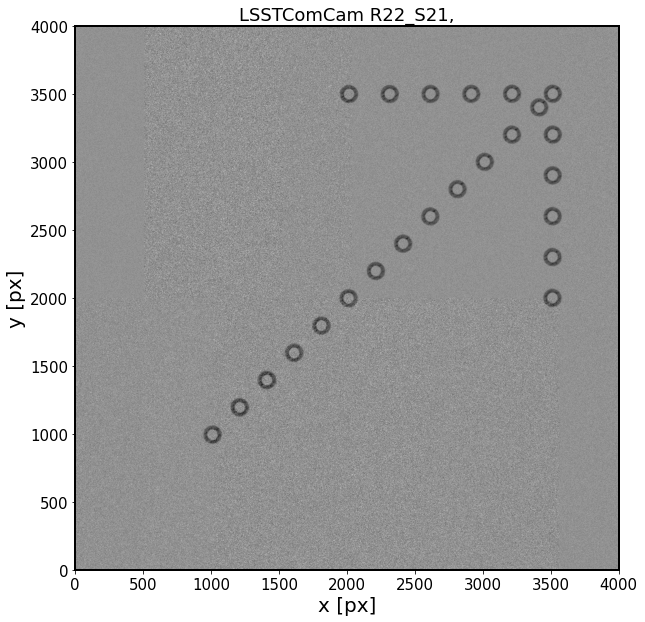

In [120]:
# show the postISR image ... 

repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/arrowsComCam/DATA/')

# need to specify the calib collections to be able to access the camera 
instrument = 'LSSTComCam'
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )

dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )
exp_num = dataset.dataId["exposure"]

exposure = butler.get('postISRCCD', detector='R22_S21', instrument=instrument,
          exposure=exp_num,collections=['run1'])

zscale = ZScaleInterval()
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(exposure.image.array, vmin=vmin,vmax=vmax,cmap='Greys')
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title(f"{instrument} {exposure.getDetector().getName()},")
plt.xlabel('x [px]')
plt.ylabel('y [px]')

In [144]:
from lsst.obs.lsst import __version__

In [146]:
__version__

'21.0.0-31-g8148eae+9341841a08'

In [148]:
# Compare the gain values ... 
from lsst.obs.lsst import LsstComCam
from lsst.obs.lsst import __version__
from astropy.io import fits

print('Using obs_lsst ', __version__)
root_dir = '/project/scichris/aos/ps1_phosim/testBkgnd/arrows/'
hdul = fits.open(os.path.join(root_dir,'repackaged', 'CC_H_20000217_006001_R22_S21.fits'))

# record the amp gain values from the image header 
phosim_amp_gain = {}
for i in range(1,len(hdul)):
    phosim_amp_gain[hdul[i].header['AMPID']] = hdul[i].header['GAIN']
    
    
# compare to the values in obs_lsst 
camera = LsstComCam().getCamera()

detector = camera['R22_S21']
for amp in detector:
    ampName = amp.getName()
    gain1 = amp.getGain()
    gain2 = phosim_amp_gain[ampName]
    print(ampName, 'LsstComCam mapper:', gain1 , 'phoSim:', gain2, 'diff: ',gain2-gain1)
    

Using obs_lsst  21.0.0-31-g8148eae+9341841a08
C10 LsstComCam mapper: 1.3104 phoSim: 1.31175 diff:  0.0013499999999999623
C11 LsstComCam mapper: 1.2822 phoSim: 1.2476 diff:  -0.034599999999999964
C12 LsstComCam mapper: 1.2663 phoSim: 1.24468 diff:  -0.021619999999999973
C13 LsstComCam mapper: 1.2798 phoSim: 1.29206 diff:  0.012259999999999938
C14 LsstComCam mapper: 1.3034 phoSim: 1.31307 diff:  0.009670000000000067
C15 LsstComCam mapper: 1.3038 phoSim: 1.34433 diff:  0.040529999999999955
C16 LsstComCam mapper: 1.3113 phoSim: 1.3312 diff:  0.01990000000000003
C17 LsstComCam mapper: 1.2881 phoSim: 1.27525 diff:  -0.012850000000000028
C07 LsstComCam mapper: 1.1728 phoSim: 1.17277 diff:  -2.999999999997449e-05
C06 LsstComCam mapper: 1.3857 phoSim: 1.4078 diff:  0.02210000000000001
C05 LsstComCam mapper: 1.3769 phoSim: 1.38711 diff:  0.010210000000000052
C04 LsstComCam mapper: 1.3843 phoSim: 1.45445 diff:  0.07014999999999993
C03 LsstComCam mapper: 1.3885 phoSim: 1.39723 diff:  0.00872999999

Still see the differences because (as it turns out), the gain was not fixed, but seeded with 3% variation, so that it's not exactly the same as in obs_lsst. 

I updated that as part of https://jira.lsstcorp.org/browse/DM-29843, so I rerun the same simulation again to show that now it works correctly:

## Rerun LsstComCam arrows, no background, fixed gain variance (and read noise )

In [159]:
phosim_path = "/project/scichris/aos/phosim_syseng4/phosim.py"
root_dir = "/project/scichris/aos/ps1_phosim/testBkgnd/"
inst_file = os.path.join(root_dir, 'starExtra.inst')
instr = 'comcam'
cmd_file = '/project/scichris/aos/ps1_phosim/noBkgnd.cmd'
work_dir = os.path.join(root_dir, 'arrowsComCam_fixGain')
out_dir = os.path.join(work_dir, 'raw')
repackaged_dir = os.path.join(work_dir, "repackaged")
log_file = os.path.join(out_dir, 'starPhosim.log')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
command = f"python {phosim_path} {inst_file} -i {instr} -e 1 \
-c {cmd_file} -p 25 -o {out_dir} > {log_file} 2>&1"
print(command)

python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/ps1_phosim/testBkgnd/starExtra.inst -i comcam -e 1 -c /project/scichris/aos/ps1_phosim/noBkgnd.cmd -p 25 -o /project/scichris/aos/ps1_phosim/testBkgnd/arrowsComCam_fixGain/raw > /project/scichris/aos/ps1_phosim/testBkgnd/arrowsComCam_fixGain/raw/starPhosim.log 2>&1


In [160]:
# repackage:
command = f"phosim_repackager.py {out_dir} --out_dir {repackaged_dir} --inst {instr}"
print(command)

phosim_repackager.py /project/scichris/aos/ps1_phosim/testBkgnd/arrowsComCam_fixGain/raw --out_dir /project/scichris/aos/ps1_phosim/testBkgnd/arrowsComCam_fixGain/repackaged --inst comcam


In [161]:
# Verify  that the gain values are identical...
from lsst.obs.lsst import LsstComCam
from lsst.obs.lsst import __version__
from astropy.io import fits

print('Using obs_lsst ', __version__)
root_dir = '/project/scichris/aos/ps1_phosim/testBkgnd/arrowsComCam_fixGain/'
hdul = fits.open(os.path.join(root_dir,'repackaged', 'CC_H_20000217_006001_R22_S21.fits'))

# record the amp gain values from the image header 
phosim_amp_gain = {}
for i in range(1,len(hdul)):
    phosim_amp_gain[hdul[i].header['AMPID']] = hdul[i].header['GAIN']
    
    
# compare to the values in obs_lsst 
camera = LsstComCam().getCamera()

detector = camera['R22_S21']
for amp in detector:
    ampName = amp.getName()
    gain1 = amp.getGain()
    gain2 = phosim_amp_gain[ampName]
    print(ampName, 'LsstComCam mapper:', gain1 , 'phoSim:', gain2, 'diff: ',gain2-gain1)
    

Using obs_lsst  21.0.0-31-g8148eae+9341841a08
C10 LsstComCam mapper: 1.3104 phoSim: 1.3104 diff:  0.0
C11 LsstComCam mapper: 1.2822 phoSim: 1.2822 diff:  0.0
C12 LsstComCam mapper: 1.2663 phoSim: 1.2663 diff:  0.0
C13 LsstComCam mapper: 1.2798 phoSim: 1.2798 diff:  0.0
C14 LsstComCam mapper: 1.3034 phoSim: 1.3034 diff:  0.0
C15 LsstComCam mapper: 1.3038 phoSim: 1.3038 diff:  0.0
C16 LsstComCam mapper: 1.3113 phoSim: 1.3113 diff:  0.0
C17 LsstComCam mapper: 1.2881 phoSim: 1.2881 diff:  0.0
C07 LsstComCam mapper: 1.1728 phoSim: 1.1728 diff:  0.0
C06 LsstComCam mapper: 1.3857 phoSim: 1.3857 diff:  0.0
C05 LsstComCam mapper: 1.3769 phoSim: 1.3769 diff:  0.0
C04 LsstComCam mapper: 1.3843 phoSim: 1.3843 diff:  0.0
C03 LsstComCam mapper: 1.3885 phoSim: 1.3885 diff:  0.0
C02 LsstComCam mapper: 1.3835 phoSim: 1.3835 diff:  0.0
C01 LsstComCam mapper: 1.374 phoSim: 1.374 diff:  0.0
C00 LsstComCam mapper: 1.3723 phoSim: 1.3723 diff:  0.0


Text(0, 0.5, 'y [px]')

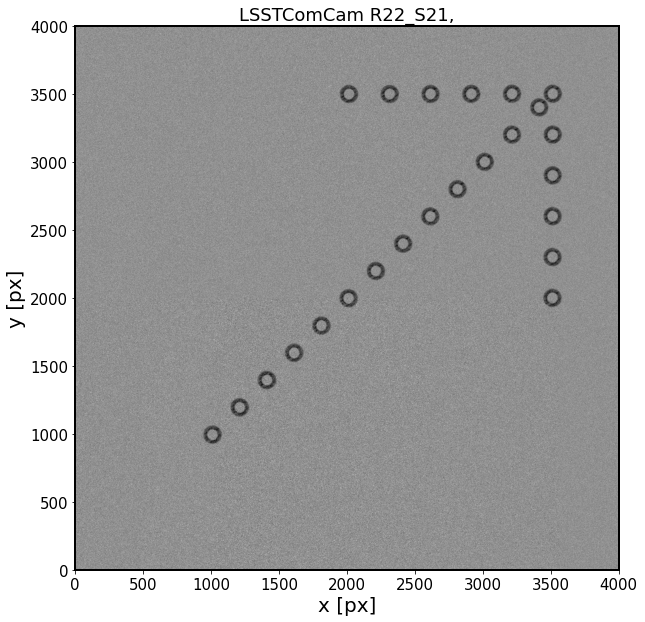

In [164]:
# show the postISR image ... 

repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/arrowsComCam_fixGain/DATA/')

# need to specify the calib collections to be able to access the camera 
instrument = 'LSSTComCam'
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )

dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )
exp_num = dataset.dataId["exposure"]

exposure = butler.get('postISRCCD', detector='R22_S21', instrument=instrument,
          exposure=exp_num,collections=['run1'])

zscale = ZScaleInterval()
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(exposure.image.array, vmin=vmin,vmax=vmax,cmap='Greys')
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title(f"{instrument} {exposure.getDetector().getName()},")
plt.xlabel('x [px]')
plt.ylabel('y [px]')

## Simulate lsstCam  with the same arrows , no background: 

In [113]:
phosim_path = "/project/scichris/aos/phosim_syseng4/phosim.py"
root_dir = "/project/scichris/aos/ps1_phosim/testBkgnd/"
inst_file = os.path.join(root_dir, 'starExtra.inst')
instr = 'lsst'
cmd_file = '/project/scichris/aos/ps1_phosim/noBkgnd.cmd'
out_dir = os.path.join(root_dir, 'arrowsLsstCam','raw')
log_file = os.path.join(out_dir, 'starPhosim.log')

command = f"python {phosim_path} {inst_file} -i {instr} -e 1 \
-c {cmd_file} -p 25 -o {out_dir} > {log_file} 2>&1"
print(command)

python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/ps1_phosim/testBkgnd/starExtra.inst -i lsst -e 1 -c /project/scichris/aos/ps1_phosim/noBkgnd.cmd -p 25 -o /project/scichris/aos/ps1_phosim/testBkgnd/arrowsLsstCam/raw > /project/scichris/aos/ps1_phosim/testBkgnd/arrowsLsstCam/raw/starPhosim.log 2>&1


In [115]:
# repackage:
work_dir = out_dir
repackaged_dir = os.path.join(root_dir,"arrowsLsstCam", "repackaged")
command = f"phosim_repackager.py {out_dir} --out_dir {repackaged_dir} --inst {instr}"
print(command)

phosim_repackager.py /project/scichris/aos/ps1_phosim/testBkgnd/arrowsLsstCam/raw --out_dir /project/scichris/aos/ps1_phosim/testBkgnd/arrowsLsstCam/repackaged --inst lsst


In [131]:
# show the content of repackaged header :
root_dir = '/project/scichris/aos/ps1_phosim/testBkgnd/arrowsLsstCam/'
hdul = fits.open(os.path.join(root_dir,'repackaged', 'MC_H_20000217_006001_R22_S21.fits'))

amp_gain = {}
for i in range(1,len(hdul)):
    a = [f'{key}: {hdul[i].header[key]}' for key in  ['AMPID','GAIN','BIAS']]
    print(a)
    amp_gain[hdul[i].header['AMPID']] = hdul[i].header['GAIN']

['AMPID: C10', 'GAIN: 1.15124', 'BIAS: 991.603']
['AMPID: C11', 'GAIN: 1.14362', 'BIAS: 1015.11']
['AMPID: C12', 'GAIN: 1.13904', 'BIAS: 1024.25']
['AMPID: C13', 'GAIN: 1.14202', 'BIAS: 1003.22']
['AMPID: C14', 'GAIN: 1.12517', 'BIAS: 1018.03']
['AMPID: C15', 'GAIN: 1.12651', 'BIAS: 1012.41']
['AMPID: C16', 'GAIN: 1.13188', 'BIAS: 992.722']
['AMPID: C17', 'GAIN: 1.12327', 'BIAS: 981.551']
['AMPID: C07', 'GAIN: 1.1614', 'BIAS: 978.906']
['AMPID: C06', 'GAIN: 1.16392', 'BIAS: 1017.46']
['AMPID: C05', 'GAIN: 1.16266', 'BIAS: 994.49']
['AMPID: C04', 'GAIN: 1.16062', 'BIAS: 1012.84']
['AMPID: C03', 'GAIN: 1.14752', 'BIAS: 990.475']
['AMPID: C02', 'GAIN: 1.15721', 'BIAS: 1000.4']
['AMPID: C01', 'GAIN: 1.16629', 'BIAS: 1008.0']
['AMPID: C00', 'GAIN: 1.15747', 'BIAS: 1032.87']


In [132]:
amp_gain

{'C10': 1.15124,
 'C11': 1.14362,
 'C12': 1.13904,
 'C13': 1.14202,
 'C14': 1.12517,
 'C15': 1.12651,
 'C16': 1.13188,
 'C17': 1.12327,
 'C07': 1.1614,
 'C06': 1.16392,
 'C05': 1.16266,
 'C04': 1.16062,
 'C03': 1.14752,
 'C02': 1.15721,
 'C01': 1.16629,
 'C00': 1.15747}

In [123]:
# show the content of the obs lsst mapper 
from lsst.obs.lsst import LsstCam
camera = LsstCam().getCamera()
detector = camera['R22_S21']
for amp in detector:
    print(amp.getName(), amp.getGain())

C10 1.15124
C11 1.14362
C12 1.13904
C13 1.14202
C14 1.12517
C15 1.12651
C16 1.13188
C17 1.12327
C07 1.1614
C06 1.16392
C05 1.16266
C04 1.16062
C03 1.14752
C02 1.15721
C01 1.16629
C00 1.15747


In [ ]:
os.list

In [136]:
# Verify  that the gain values are identical...
from lsst.obs.lsst import LsstCam
from astropy.io import fits

root_dir = '/project/scichris/aos/ps1_phosim/testBkgnd/arrowsLsstCam/'
hdul = fits.open(os.path.join(root_dir,'repackaged', 'MC_H_20000217_006001_R22_S21.fits'))

phosim_amp_gain = {}
for i in range(1,len(hdul)):
    phosim_amp_gain[hdul[i].header['AMPID']] = hdul[i].header['GAIN']
    
    

camera = LsstCam().getCamera()

detector = camera['R22_S21']
for amp in detector:
    ampName = amp.getName()
    gain1 = amp.getGain()
    gain2 = phosim_amp_gain[ampName]
    print(ampName, 'LsstCam mapper:', gain1 , 'phoSim:', gain2, 'diff: ', gain2-gain1 )
    

C10 LsstCam mapper: 1.15124 phoSim: 1.15124 diff:  0.0
C11 LsstCam mapper: 1.14362 phoSim: 1.14362 diff:  0.0
C12 LsstCam mapper: 1.13904 phoSim: 1.13904 diff:  0.0
C13 LsstCam mapper: 1.14202 phoSim: 1.14202 diff:  0.0
C14 LsstCam mapper: 1.12517 phoSim: 1.12517 diff:  0.0
C15 LsstCam mapper: 1.12651 phoSim: 1.12651 diff:  0.0
C16 LsstCam mapper: 1.13188 phoSim: 1.13188 diff:  0.0
C17 LsstCam mapper: 1.12327 phoSim: 1.12327 diff:  0.0
C07 LsstCam mapper: 1.1614 phoSim: 1.1614 diff:  0.0
C06 LsstCam mapper: 1.16392 phoSim: 1.16392 diff:  0.0
C05 LsstCam mapper: 1.16266 phoSim: 1.16266 diff:  0.0
C04 LsstCam mapper: 1.16062 phoSim: 1.16062 diff:  0.0
C03 LsstCam mapper: 1.14752 phoSim: 1.14752 diff:  0.0
C02 LsstCam mapper: 1.15721 phoSim: 1.15721 diff:  0.0
C01 LsstCam mapper: 1.16629 phoSim: 1.16629 diff:  0.0
C00 LsstCam mapper: 1.15747 phoSim: 1.15747 diff:  0.0


Text(0, 0.5, 'y [px]')

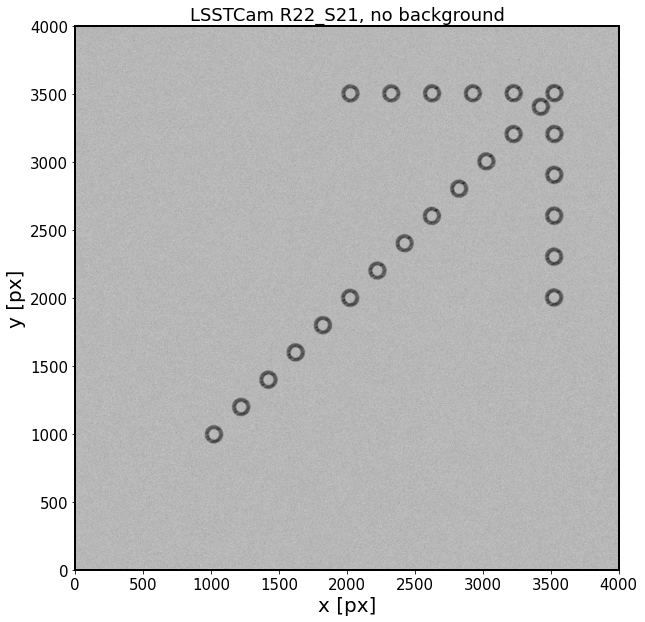

In [157]:
# show the postISR image ... 

repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/arrowsLsstCam/DATA/')

# need to specify the calib collections to be able to access the camera 
instrument = 'LSSTCam'
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )

dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )
exp_num = dataset.dataId["exposure"]

exposure = butler.get('postISRCCD', detector='R22_S21', instrument=instrument,
          exposure=exp_num,collections=['run1'])

zscale = ZScaleInterval()
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(exposure.image.array, vmin=vmin,vmax=vmax,cmap='Greys')
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title(f"{instrument} {exposure.getDetector().getName()}, no background")
plt.xlabel('x [px]')
plt.ylabel('y [px]')

and this looks all clean, because the gain information in the segmentation.txt has no variance, i.e. it's taken at face value, which is identical to that in obs_lsst. 

Now, still there is an issue with **quickbackground:**

### Simulate LsstCam arrows with quick background 

In [152]:
phosim_path = "/project/scichris/aos/phosim_syseng4/phosim.py"
root_dir = "/project/scichris/aos/ps1_phosim/testBkgnd/"
inst_file = os.path.join(root_dir, 'starExtra.inst')
instr = 'lsst'
cmd_file = '/project/scichris/aos/ps1_phosim/qckBkgnd.cmd'
work_dir = os.path.join(root_dir, 'arrowsLsstCam_QckBkgnd')
out_dir = os.path.join(work_dir, 'raw')
log_file = os.path.join(out_dir, 'starPhosim.log')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
command = f"python {phosim_path} {inst_file} -i {instr} -e 1 \
-c {cmd_file} -p 25 -o {out_dir} > {log_file} 2>&1"
print(command)

python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/ps1_phosim/testBkgnd/starExtra.inst -i lsst -e 1 -c /project/scichris/aos/ps1_phosim/qckBkgnd.cmd -p 25 -o /project/scichris/aos/ps1_phosim/testBkgnd/arrowsLsstCam_QckBkgnd/raw > /project/scichris/aos/ps1_phosim/testBkgnd/arrowsLsstCam_QckBkgnd/raw/starPhosim.log 2>&1


In [153]:
# repackage:

repackaged_dir = os.path.join(work_dir,"repackaged")
command = f"phosim_repackager.py {out_dir} --out_dir {repackaged_dir} --inst {instr}"
print(command)

phosim_repackager.py /project/scichris/aos/ps1_phosim/testBkgnd/arrowsLsstCam_QckBkgnd/raw --out_dir /project/scichris/aos/ps1_phosim/testBkgnd/arrowsLsstCam_QckBkgnd/repackaged --inst lsst


In [149]:
# show the content of repackaged header :
# should be the same as above, i.e. case of no background at all ... 
hdul = fits.open(os.path.join(work_dir,'repackaged', 'MC_H_20000217_006001_R22_S21.fits'))

for i in range(1,len(hdul)):
    a = [f'{key}: {hdul[i].header[key]}' for key in  ['AMPID','GAIN','BIAS']]
    print(a)

['AMPID: C10', 'GAIN: 1.15124', 'BIAS: 991.603']
['AMPID: C11', 'GAIN: 1.14362', 'BIAS: 1015.11']
['AMPID: C12', 'GAIN: 1.13904', 'BIAS: 1024.25']
['AMPID: C13', 'GAIN: 1.14202', 'BIAS: 1003.22']
['AMPID: C14', 'GAIN: 1.12517', 'BIAS: 1018.03']
['AMPID: C15', 'GAIN: 1.12651', 'BIAS: 1012.41']
['AMPID: C16', 'GAIN: 1.13188', 'BIAS: 992.722']
['AMPID: C17', 'GAIN: 1.12327', 'BIAS: 981.551']
['AMPID: C07', 'GAIN: 1.1614', 'BIAS: 978.906']
['AMPID: C06', 'GAIN: 1.16392', 'BIAS: 1017.46']
['AMPID: C05', 'GAIN: 1.16266', 'BIAS: 994.49']
['AMPID: C04', 'GAIN: 1.16062', 'BIAS: 1012.84']
['AMPID: C03', 'GAIN: 1.14752', 'BIAS: 990.475']
['AMPID: C02', 'GAIN: 1.15721', 'BIAS: 1000.4']
['AMPID: C01', 'GAIN: 1.16629', 'BIAS: 1008.0']
['AMPID: C00', 'GAIN: 1.15747', 'BIAS: 1032.87']


In [150]:
# show the content of the obs lsst mapper 
# should be exactly the same as above ... 
from lsst.obs.lsst import LsstCam
camera = LsstCam().getCamera()
detector = camera['R22_S21']
for amp in detector:
    print(amp.getName(), amp.getGain())

C10 1.15124
C11 1.14362
C12 1.13904
C13 1.14202
C14 1.12517
C15 1.12651
C16 1.13188
C17 1.12327
C07 1.1614
C06 1.16392
C05 1.16266
C04 1.16062
C03 1.14752
C02 1.15721
C01 1.16629
C00 1.15747


Text(0, 0.5, 'y [px]')

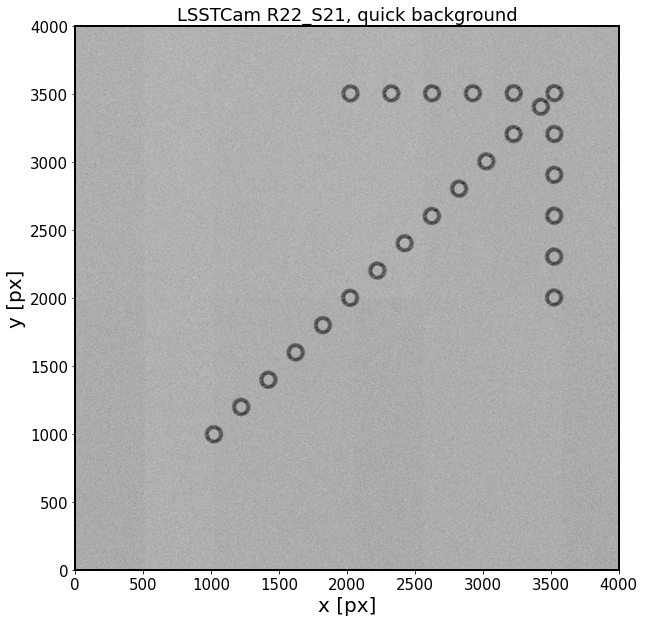

In [155]:
# show the postISR image ... 

repo_dir = os.path.join(work_dir , 'DATA')

# need to specify the calib collections to be able to access the camera 
instrument = 'LSSTCam'
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )

dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                    )
               )
exp_num = dataset.dataId["exposure"]

exposure = butler.get('postISRCCD', detector='R22_S21', instrument=instrument,
          exposure=exp_num,collections=['run1'])

zscale = ZScaleInterval()
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)

fig = plt.figure(figsize=(10,10))
plt.imshow(exposure.image.array, vmin=vmin,vmax=vmax,cmap='Greys')
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title(f"{instrument} {exposure.getDetector().getName()}, quick background")
plt.xlabel('x [px]')
plt.ylabel('y [px]')